In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

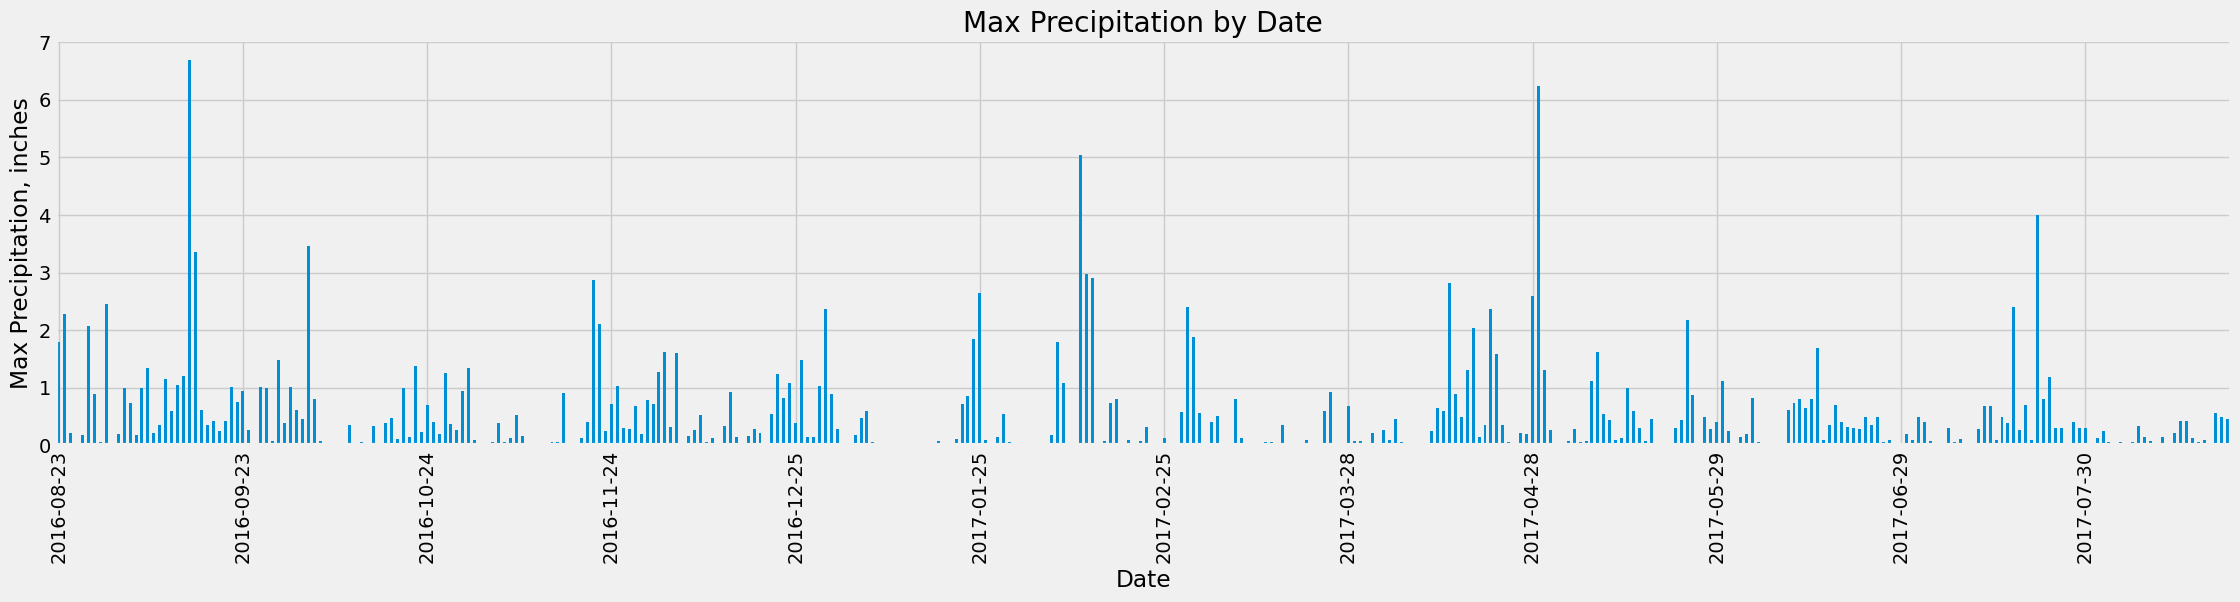

<Figure size 640x480 with 0 Axes>

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(results, columns=['date', 'precip_score'])
precip_df.set_index('date', inplace = True)


# Sort the dataframe by date
precip_sorted = precip_df.sort_values(by=['date'])
precip_max_bydate = precip_sorted.groupby("date").max()


# Use Pandas Plotting with Matplotlib to plot the data

precip_plot = precip_max_bydate.plot(kind ="bar", figsize=(25, 5),
                                     title="Max Precipitation by Date",
                                     xlabel="Date", ylabel="Max Precipitation, inches",
                                    legend=None)
xticklabels = precip_max_bydate.index
precip_plot.set_xticklabels(xticklabels,rotation=90)
plt.locator_params(axis='x', nbins=12)
plt.show()

plt.tight_layout()



In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precip_score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

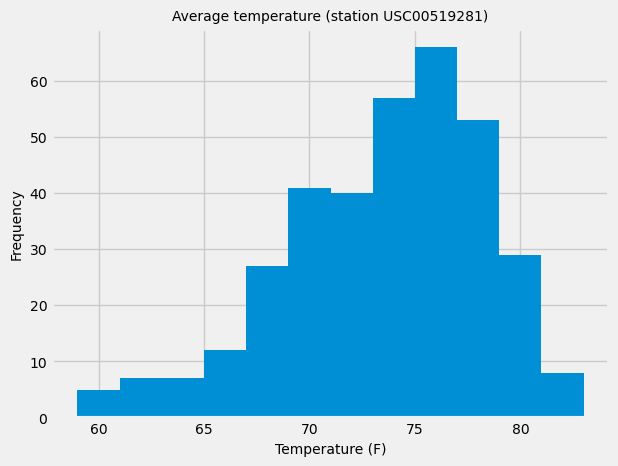

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()


# plot the results as a histogram
station_df = pd.DataFrame(results, columns=['tobs'])

plt.hist(station_df['tobs'], bins=12)
plt.title("Average temperature (station USC00519281)", fontsize=10)
plt.xlabel("Temperature (F)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Close session

In [42]:
# Close Session
session.close()